In [1]:
import networkx as nx
import matplotlib.pyplot as plot

#一个cell多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## 读取数据
g = nx.read_pajek("D:\\program\\networks\data\\russians.net")
len(g) # 读取图的长度

87250

In [4]:
## 计算图g的度
deg1 = nx.degree(g)

In [6]:
deg = dict(deg1) #deg 是Iterator类型，需要转换为dict类型，才可以进行进一步计算

In [96]:
type(deg)
type(deg1)

dict

networkx.classes.reportviews.MultiDegreeView

In [ ]:
##  deg图中degree centrality （中心性）的相关计算

In [11]:
### 度数中心性（degree centrality）
min(deg.values())

1

In [12]:
### 计算deg中degree centrality 的最大值
max(deg.values())

4691

In [21]:
### 返回degree centrality（中心性）的列表
def sorted_map(map):
    # lambda d:d[1]按照字典中的值排序，reverse=True降序排序
    ms = sorted(map.items(),key= lambda d:d[1],reverse=True)
    return ms
ds = sorted_map(deg)
ds[0:9]

[('borisakunin', 4691),
 ('doctor_liza', 3046),
 ('tareeva', 2970),
 ('cheger', 2887),
 ('karial', 2717),
 ('snorapp', 2707),
 ('masha_koroleva', 2683),
 ('elladkin', 2616),
 ('samoleg', 2597)]

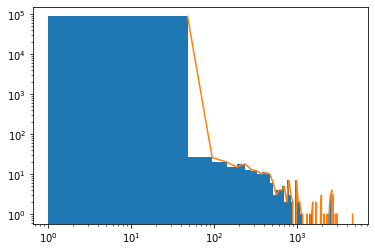

In [18]:
### 各节点degree centrality的分布情况
h = plot.hist(dict(deg).values(),100)
plot.loglog(h[1][1:],h[0])

In [16]:
### 删除孤立节点（度数为1的节点）和重复节点，返回新的网络图
def trim_degrees(g,degree):
    g2 = g.copy()
    d = nx.degree(g2)
    #d = len(g2)
    for n in list(g2.nodes()):
        if d[n] <= degree:
            g2.remove_node(n)
    return g2

core1 = trim_degrees(g,1)
len(core1)

### 删除度数为10 的节点
core10 = trim_degrees(g,10)
len(core10)

25905

611

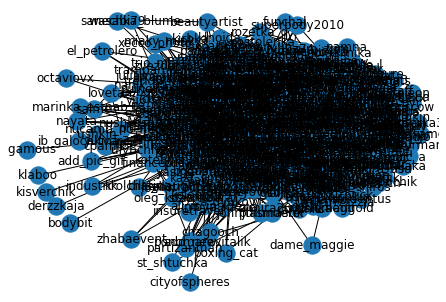

In [23]:
#绘制中心性网络图
nx.draw(core10,with_labels=True)

In [22]:
### 接近中心性 clonessness centrality
c = nx.closeness_centrality(core10)
cs = sorted_map(c) #对结果进行排序
cs[:10]

[('azbukivedi', 0.6174089068825911),
 ('valerois', 0.6106106106106106),
 ('bagira', 0.5910852713178295),
 ('karial', 0.5749293119698398),
 ('kpoxa_e', 0.5733082706766918),
 ('yelya', 0.5374449339207048),
 ('kirulya', 0.5364995602462621),
 ('angerona', 0.5355575065847235),
 ('borisakunin', 0.5322862129144852),
 ('snorapp', 0.5304347826086957)]

(array([ 70., 100., 188., 169.,  48.,  23.,   8.,   0.,   3.,   2.]),
 array([0.37700865, 0.40104868, 0.4250887 , 0.44912873, 0.47316875,
        0.49720878, 0.52124881, 0.54528883, 0.56932886, 0.59336888,
        0.61740891]),
 <BarContainer object of 10 artists>)

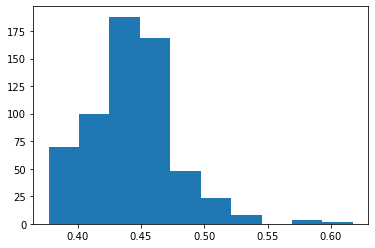

In [25]:
plot.hist(dict(c).values())  #接近中心性的分布

In [27]:
### 中介中心性 betweenness centrality
core11 = nx.DiGraph(core10)
b = nx.betweenness_centrality(core11)
bs = sorted_map(b)
bs[:10]

[('valerois', 0.19797072055956402),
 ('azbukivedi', 0.09236152064854664),
 ('bagira', 0.06536545576226058),
 ('karial', 0.050280309720364985),
 ('kpoxa_e', 0.0411808675767331),
 ('snorapp', 0.0266418881572934),
 ('borisakunin', 0.023414449526773046),
 ('kirulya', 0.02250083652145264),
 ('eprst2000', 0.021777315335358458),
 ('doctor_liza', 0.020776245095281833)]

In [71]:
### 计算三种中心性
#创建列表，存储三种不同中心性测量值的前10
name1 = [x[0] for x in ds[:10]]
name2 = [x[0] for x in cs[:10]]
name3 = [x[0] for x in bs[:10]]

# 使用Python的set函数将三组列表拼到一起
names = list(set(name1) | set(name2) | set(name3))

#创建中心性列表.d,c,b分别为对应的字典
table = [[name,deg[name],c[name],b[name]] for name in names]
table

[['doctor_liza', 3046, 0.48145224940805054, 0.020776245095281833],
 ['bagira', 1481, 0.5910852713178295, 0.06536545576226058],
 ['eprst2000', 2510, 0.5290546400693842, 0.021777315335358458],
 ['masha_koroleva', 2683, 0.4959349593495935, 0.012811696006419177],
 ['borisakunin', 4691, 0.5322862129144852, 0.023414449526773046],
 ['kpoxa_e', 946, 0.5733082706766918, 0.0411808675767331],
 ['zina_korzina', 2596, 0.4923325262308313, 0.00879744262652818],
 ['cheger', 2887, 0.3981723237597911, 0.0007156846971123082],
 ['angerona', 752, 0.5355575065847235, 0.019517053107582113],
 ['kirulya', 2398, 0.5364995602462621, 0.02250083652145264],
 ['snorapp', 2707, 0.5304347826086957, 0.0266418881572934],
 ['karial', 2717, 0.5749293119698398, 0.050280309720364985],
 ['elladkin', 2616, 0.4642313546423135, 0.015926115645334093],
 ['valerois', 232, 0.6106106106106106, 0.19797072055956402],
 ['azbukivedi', 2541, 0.6174089068825911, 0.09236152064854664],
 ['samoleg', 2597, 0.4750778816199377, 0.01586547571861

In [83]:
 ###特征向量中心性eigenvector_centrality
e = nx.eigenvector_centrality(core11)

In [88]:
#TOP10特征向量中心性
es = sorted_map(e)
es[0:10]


[('borisakunin', 0.31795042644649024),
 ('azbukivedi', 0.1938260892641283),
 ('doctor_liza', 0.16502760913590528),
 ('snorapp', 0.15884682173229087),
 ('tareeva', 0.15475825818165223),
 ('bakushinskaya', 0.1483965814886991),
 ('eprst2000', 0.14751796946571039),
 ('gracebirkin', 0.14704488049152348),
 ('emmanuelle_cunt', 0.1358619670502147),
 ('karial', 0.135506678927923)]

In [94]:
### PageRank 算法
p = nx.pagerank(core11)

In [95]:
#ageRank Top10 
pr = sorted_map(p)
pr[0:10]

[('valerois', 0.01688354131104867),
 ('azbukivedi', 0.01509175798050664),
 ('bagira', 0.013183992148903045),
 ('karial', 0.011012774429539579),
 ('kpoxa_e', 0.010267642939779248),
 ('snorapp', 0.00841570449573836),
 ('angerona', 0.007886524248642642),
 ('kirulya', 0.00784795956640427),
 ('borisakunin', 0.0076366304900151545),
 ('doctor_liza', 0.0073641378170415574)]

In [98]:
name1 = [x[0] for x in ds[:10]]
name2 = [x[0] for x in cs[:10]]
name3 = [x[0] for x in bs[:10]]
name4 = [x[0] for x in es[:10]]
name5 = [x[0] for x in pr[:10]]
# 使用Python的set函数将五组列表拼到一起
names = list(set(name1) | set(name2) | set(name3) | set(name4) | set(name5))
#创建中心性列表。
table = [[name,deg[name],c[name],b[name],e[name],p[name]] for name in names]
print("五种中心性列表为：" )
table

五种中心性列表为：


[['doctor_liza',
  3046,
  0.48145224940805054,
  0.020776245095281833,
  0.16502760913590528,
  0.0073641378170415574],
 ['bagira',
  1481,
  0.5910852713178295,
  0.06536545576226058,
  0.08624379016113644,
  0.013183992148903045],
 ['eprst2000',
  2510,
  0.5290546400693842,
  0.021777315335358458,
  0.14751796946571039,
  0.007345572723940815],
 ['masha_koroleva',
  2683,
  0.4959349593495935,
  0.012811696006419177,
  0.13184395711205035,
  0.005697560237328375],
 ['borisakunin',
  4691,
  0.5322862129144852,
  0.023414449526773046,
  0.31795042644649024,
  0.0076366304900151545],
 ['kpoxa_e',
  946,
  0.5733082706766918,
  0.0411808675767331,
  0.0724319523113419,
  0.010267642939779248],
 ['gracebirkin',
  2575,
  0.5020576131687243,
  0.016155721708295417,
  0.14704488049152348,
  0.006076522613129469],
 ['emmanuelle_cunt',
  2458,
  0.5020576131687243,
  0.012624321105303713,
  0.1358619670502147,
  0.005821110852523999],
 ['zina_korzina',
  2596,
  0.4923325262308313,
  0.008